In [1]:
from all_functions import *
from multicast_analysis_plot_functions import *

# An Analysis of the Effects of Multicast on DDS Performance

- Mcast should have better performance for more participants
- How many participants does it take to see performance improvement?

## Unicast vs Multicast for Varying Participants

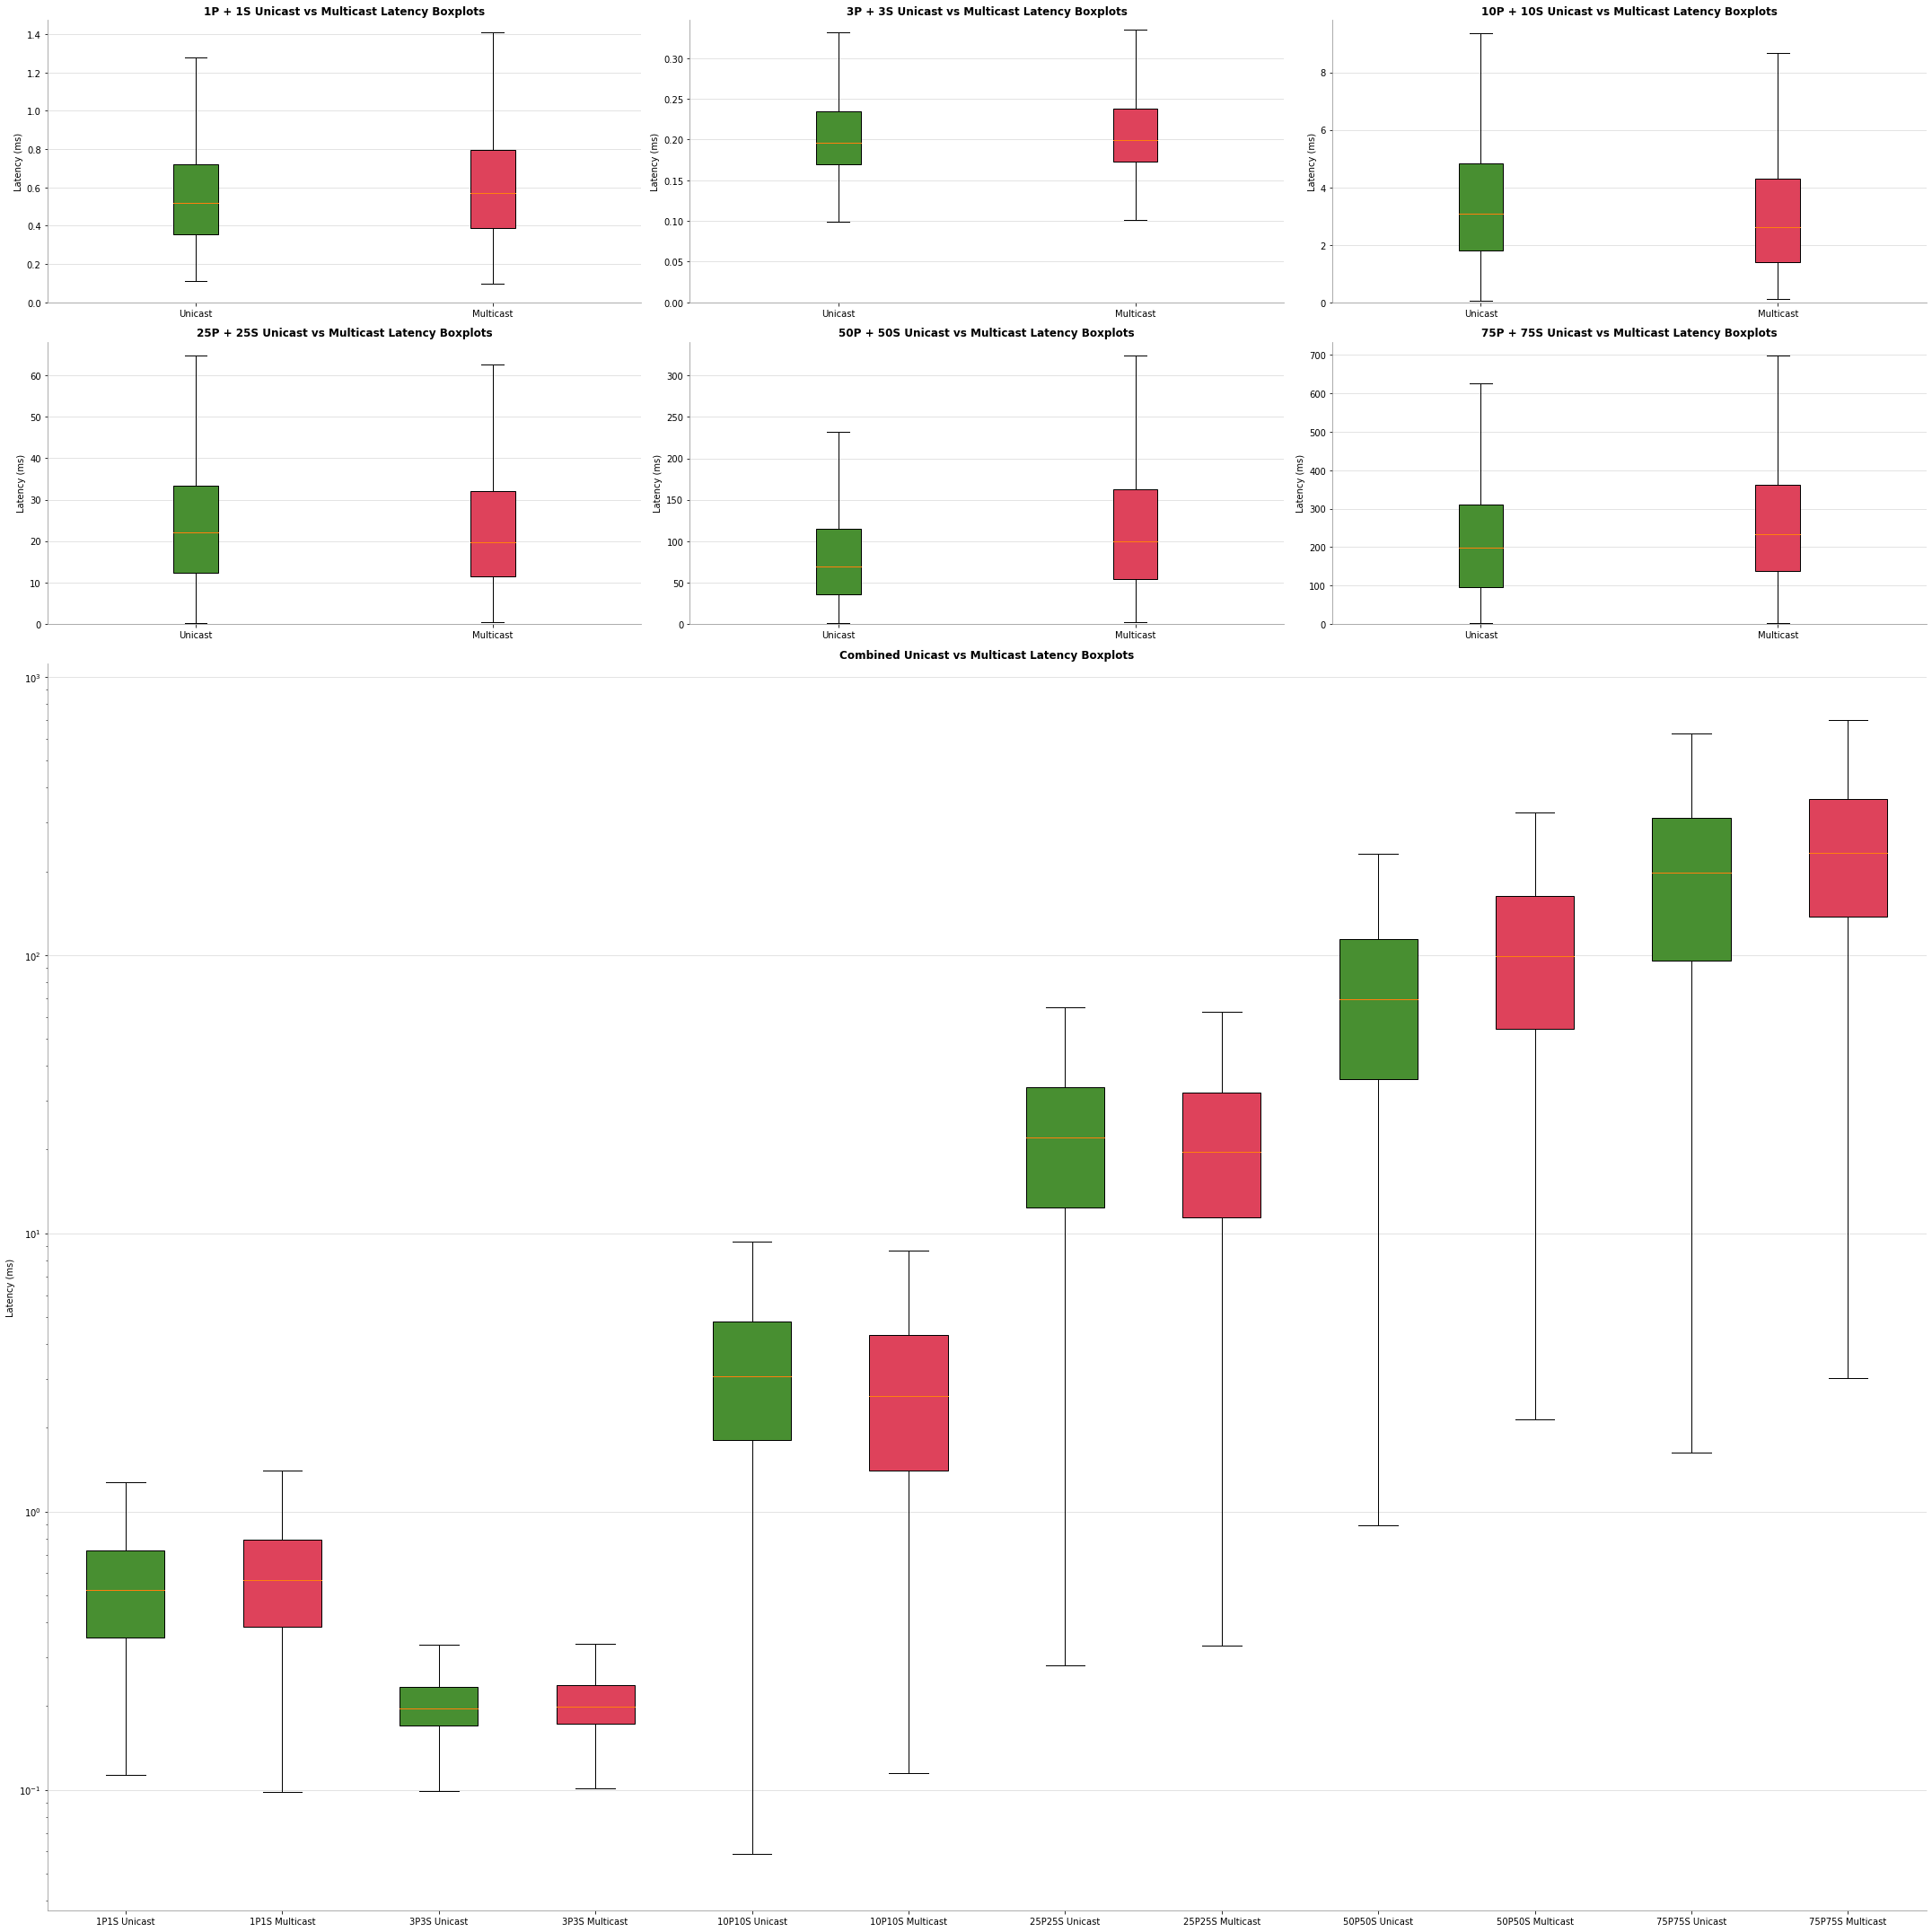

In [19]:
ucast_vs_mcast_lat_boxplots()

### What does the data tell us?
- 10P10S and 25P25S mcast outperforms ucast
- 50P50S and 75P75S ucast outperforms mcast
- **LESS P + S:** MCAST LATENCY < UCAST
- **MORE P + S:** UCAST LATENCY < MCAST

### What does this mean?
- mcast should outperfom ucast for higher participants but it doesn't
- same with the other way round
- the opposite of what we expect has happened

### What can we do to investigate this?
- Plot the latencies over time and see if they differ a lot between ucast and mcast

## Unicast vs Multicast Latency Line Plots

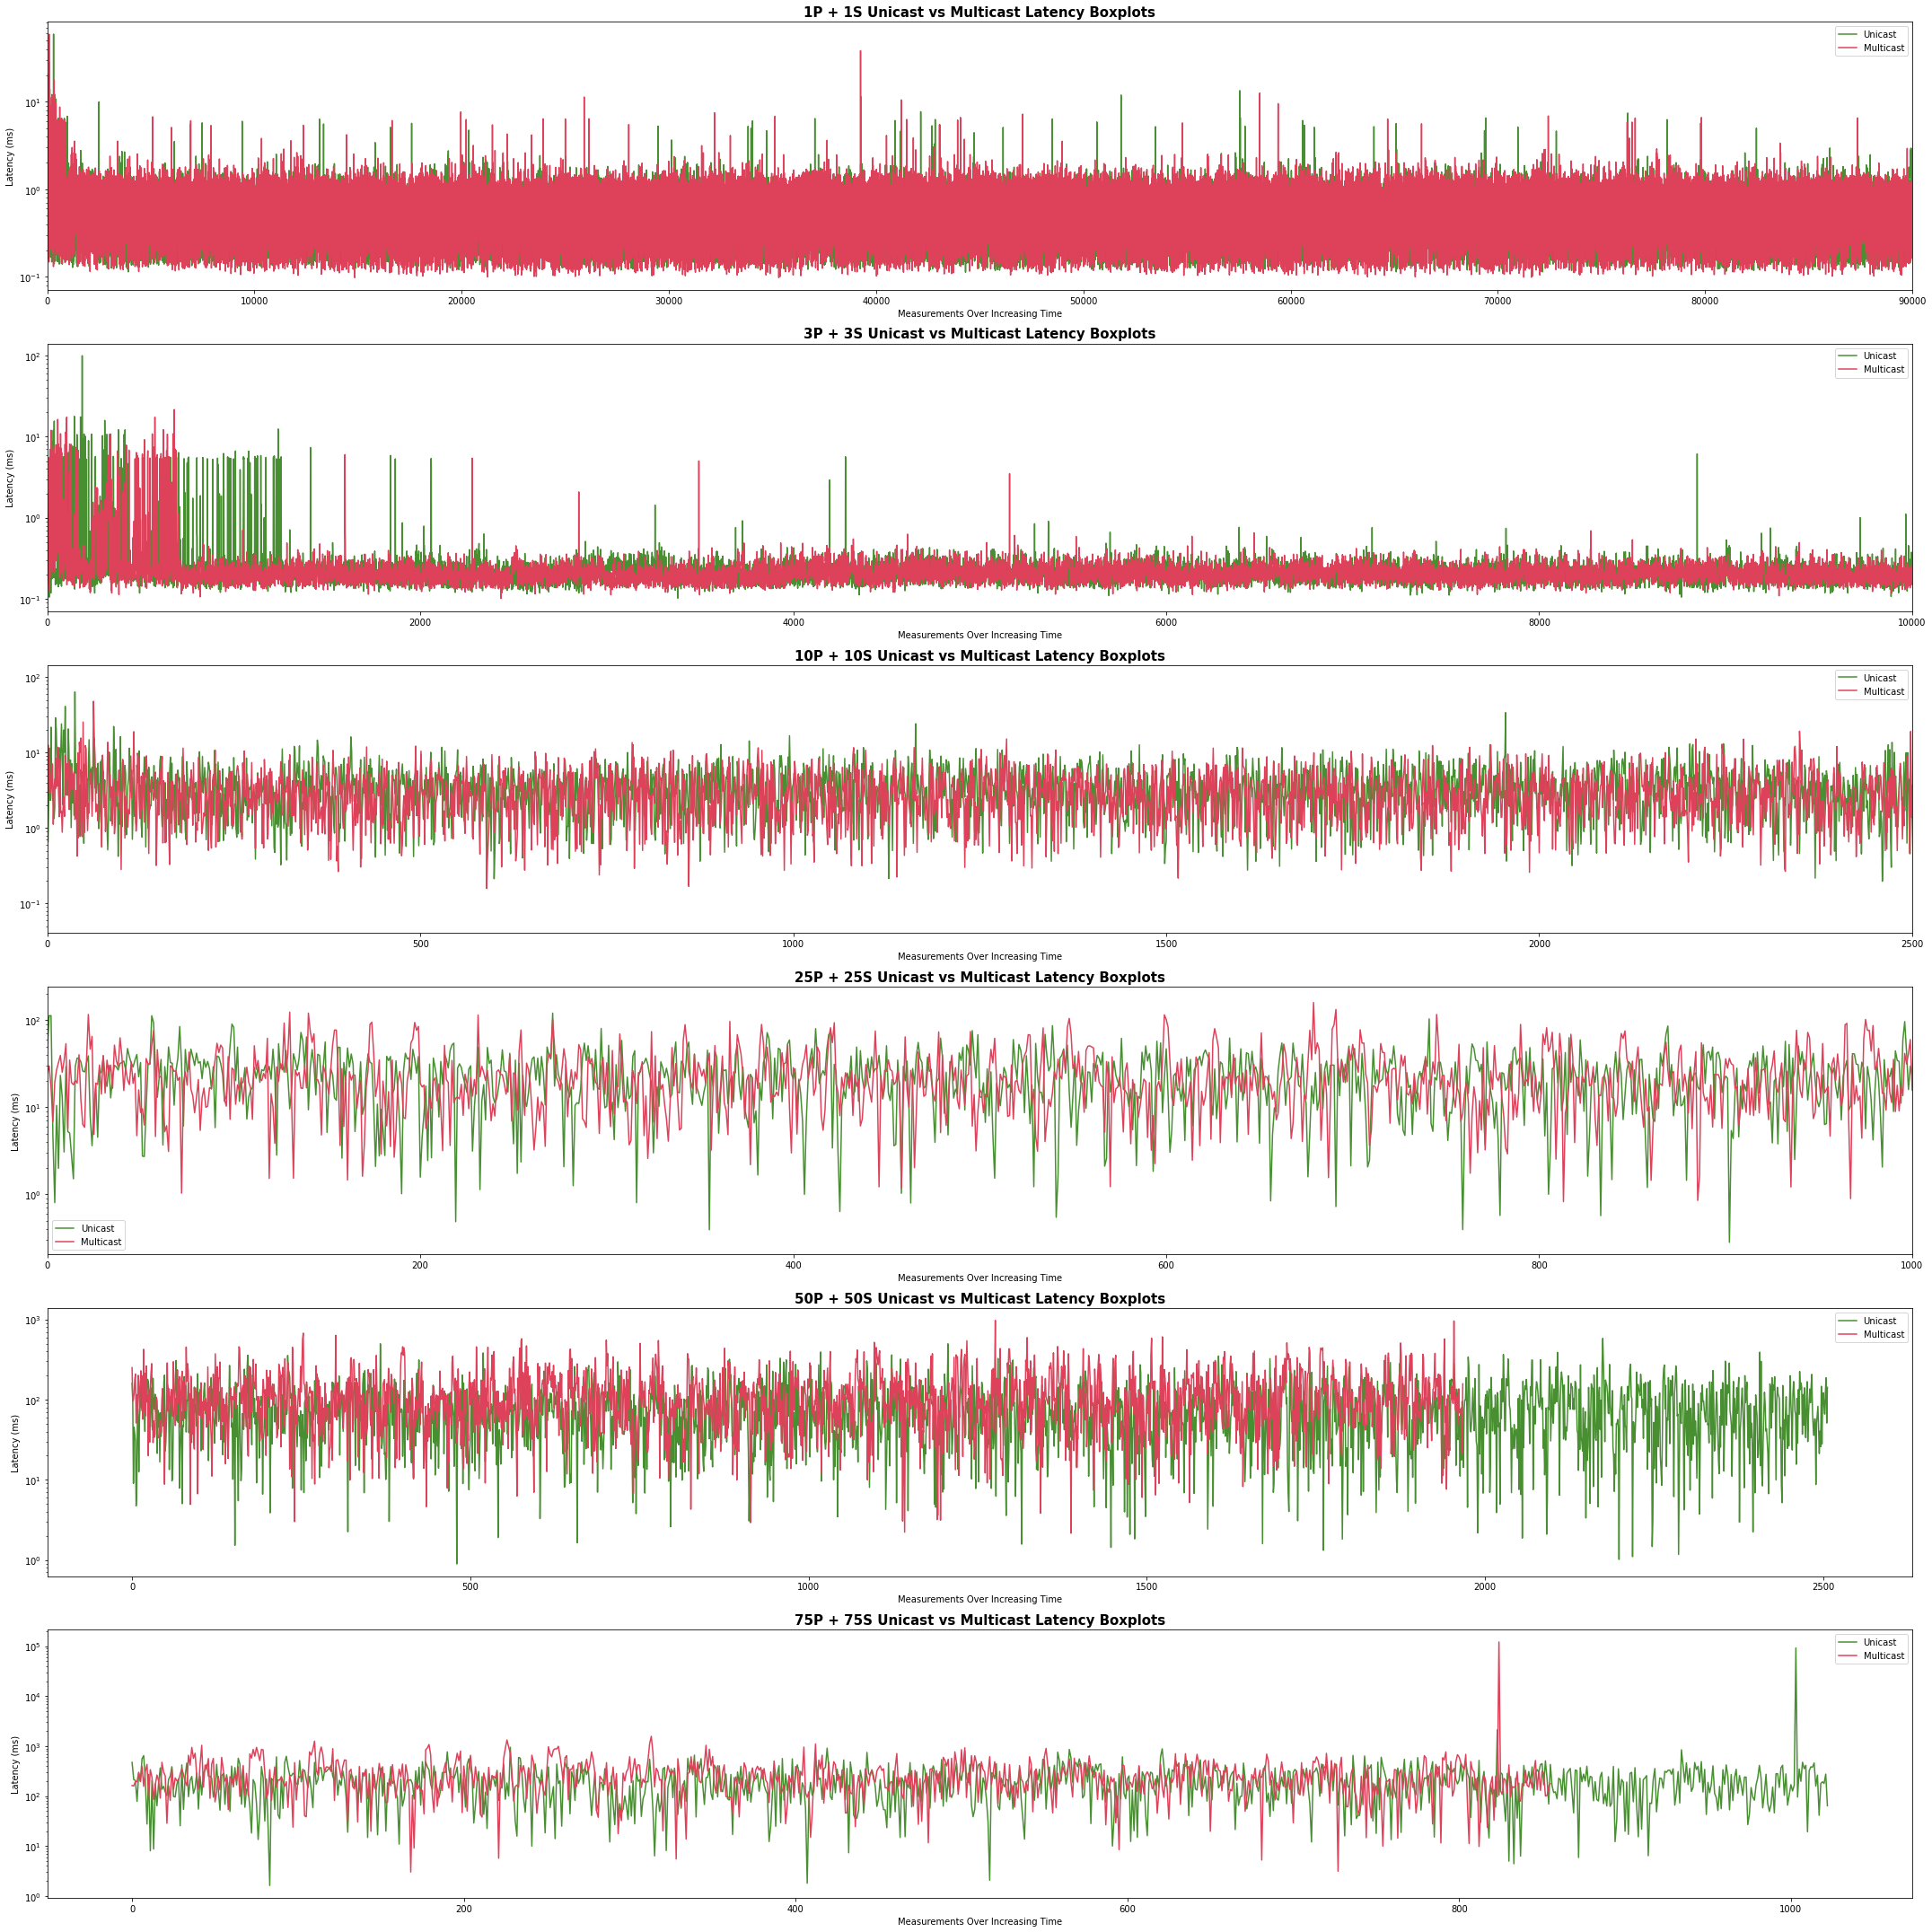

In [24]:
ucast_vs_mcast_latency_line_plots()

### What does the data tell us?
- 10p10s: 
    - mcast and ucast mean differ by 1ms
    - hard to tell difference between the two lines
- 25p25s:
    - mcast and ucast mean differ by 1ms
    - still hard to tell difference between the two lines
- 50p50s:
    - mcast has mean of 125ms and ucast has mean of 83ms: a difference of 42ms (51% increase)
    - it looks like the red line is placed higher than the green line
- 75p75s:
    - mcast has a mean of 427ms and ucast has a mean of 312ms: a difference of 115ms (37% increase)
    - looks like red line is generally placed higher than green line

### What does this mean?
- Not much performance difference with 10p10s and 25p25s
- Big difference (51% increase) for 50p50s
- Not so big but still big difference (37% increase) for 75p75s
- In all cases, multicast mean is higher, and with more participants multicast mean is a lot higher

### How can we confirm that multicast latency is generally higher?
- Plot CDFs

## Unicast vs Multicast CDFs

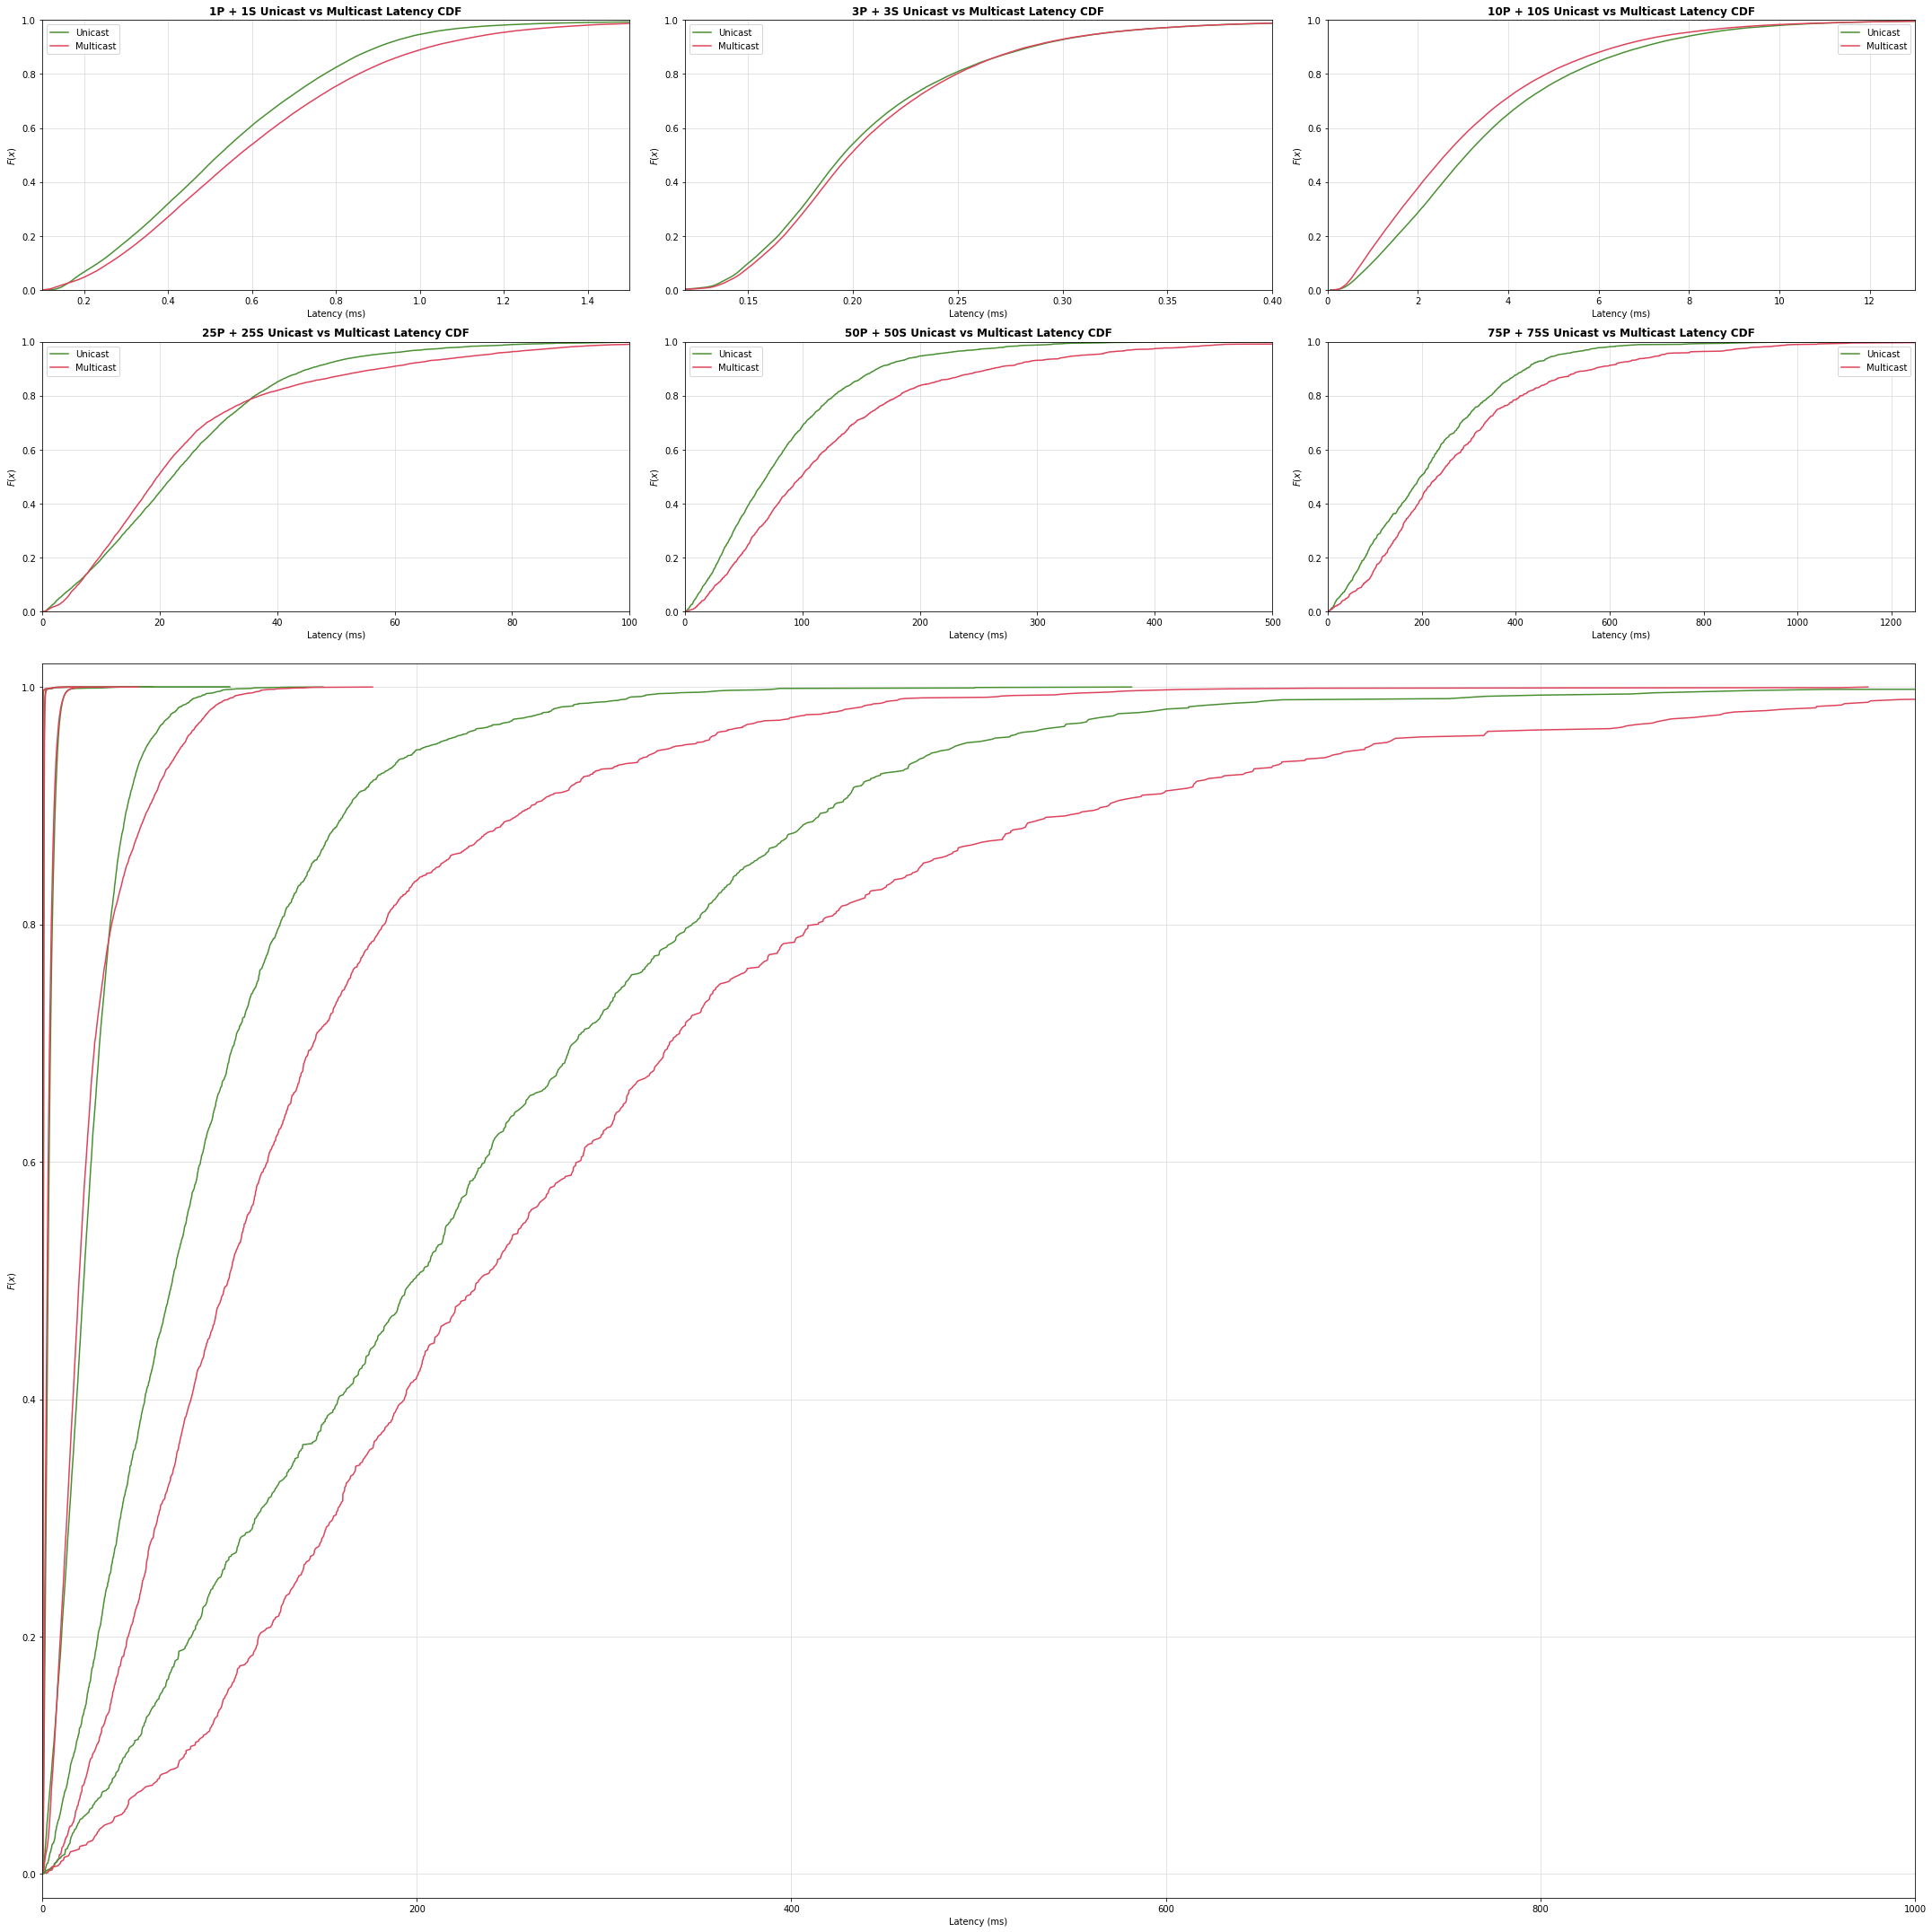

In [38]:
ucast_vs_mcast_cdfs()

### What does the data tell us?
- 10p10s:
    - Multicast has lower latency overall
- 25p25s:
    - Ucast has more latency values below 10ms than mcast
    - Mcast has more latency values between 10ms and 35ms than ucast
    - Ucast has more latency values over 35ms than mcast
- 50p50s:
    - Ucast has lower latency overall
- 75p75s:
    - Ucast has lower latency overall

### What does it exactly mean?
- Confirms that mcast has better latency for 10p10s and 25p25s
- Confirms that ucast has better latency for more participants
- Confirms that the opposite of what is expected has happened

### So why does ucast perform better than mcast for more participants?
- How does ucast work?
    - From one source to one destination
- How does mcast work?
    - From one source to multiple destinations at once
    - Intermediary routers are responsible for duplicating and broadcasting the message
    - Intermediary transportation depends on multicast routing protocol being used
- It could be intermediary communication?
    - Look at throughput
        - If throughput is high throughout the test then the subs are getting a lot of data

## Unicast vs Multicast Throughput Boxplots

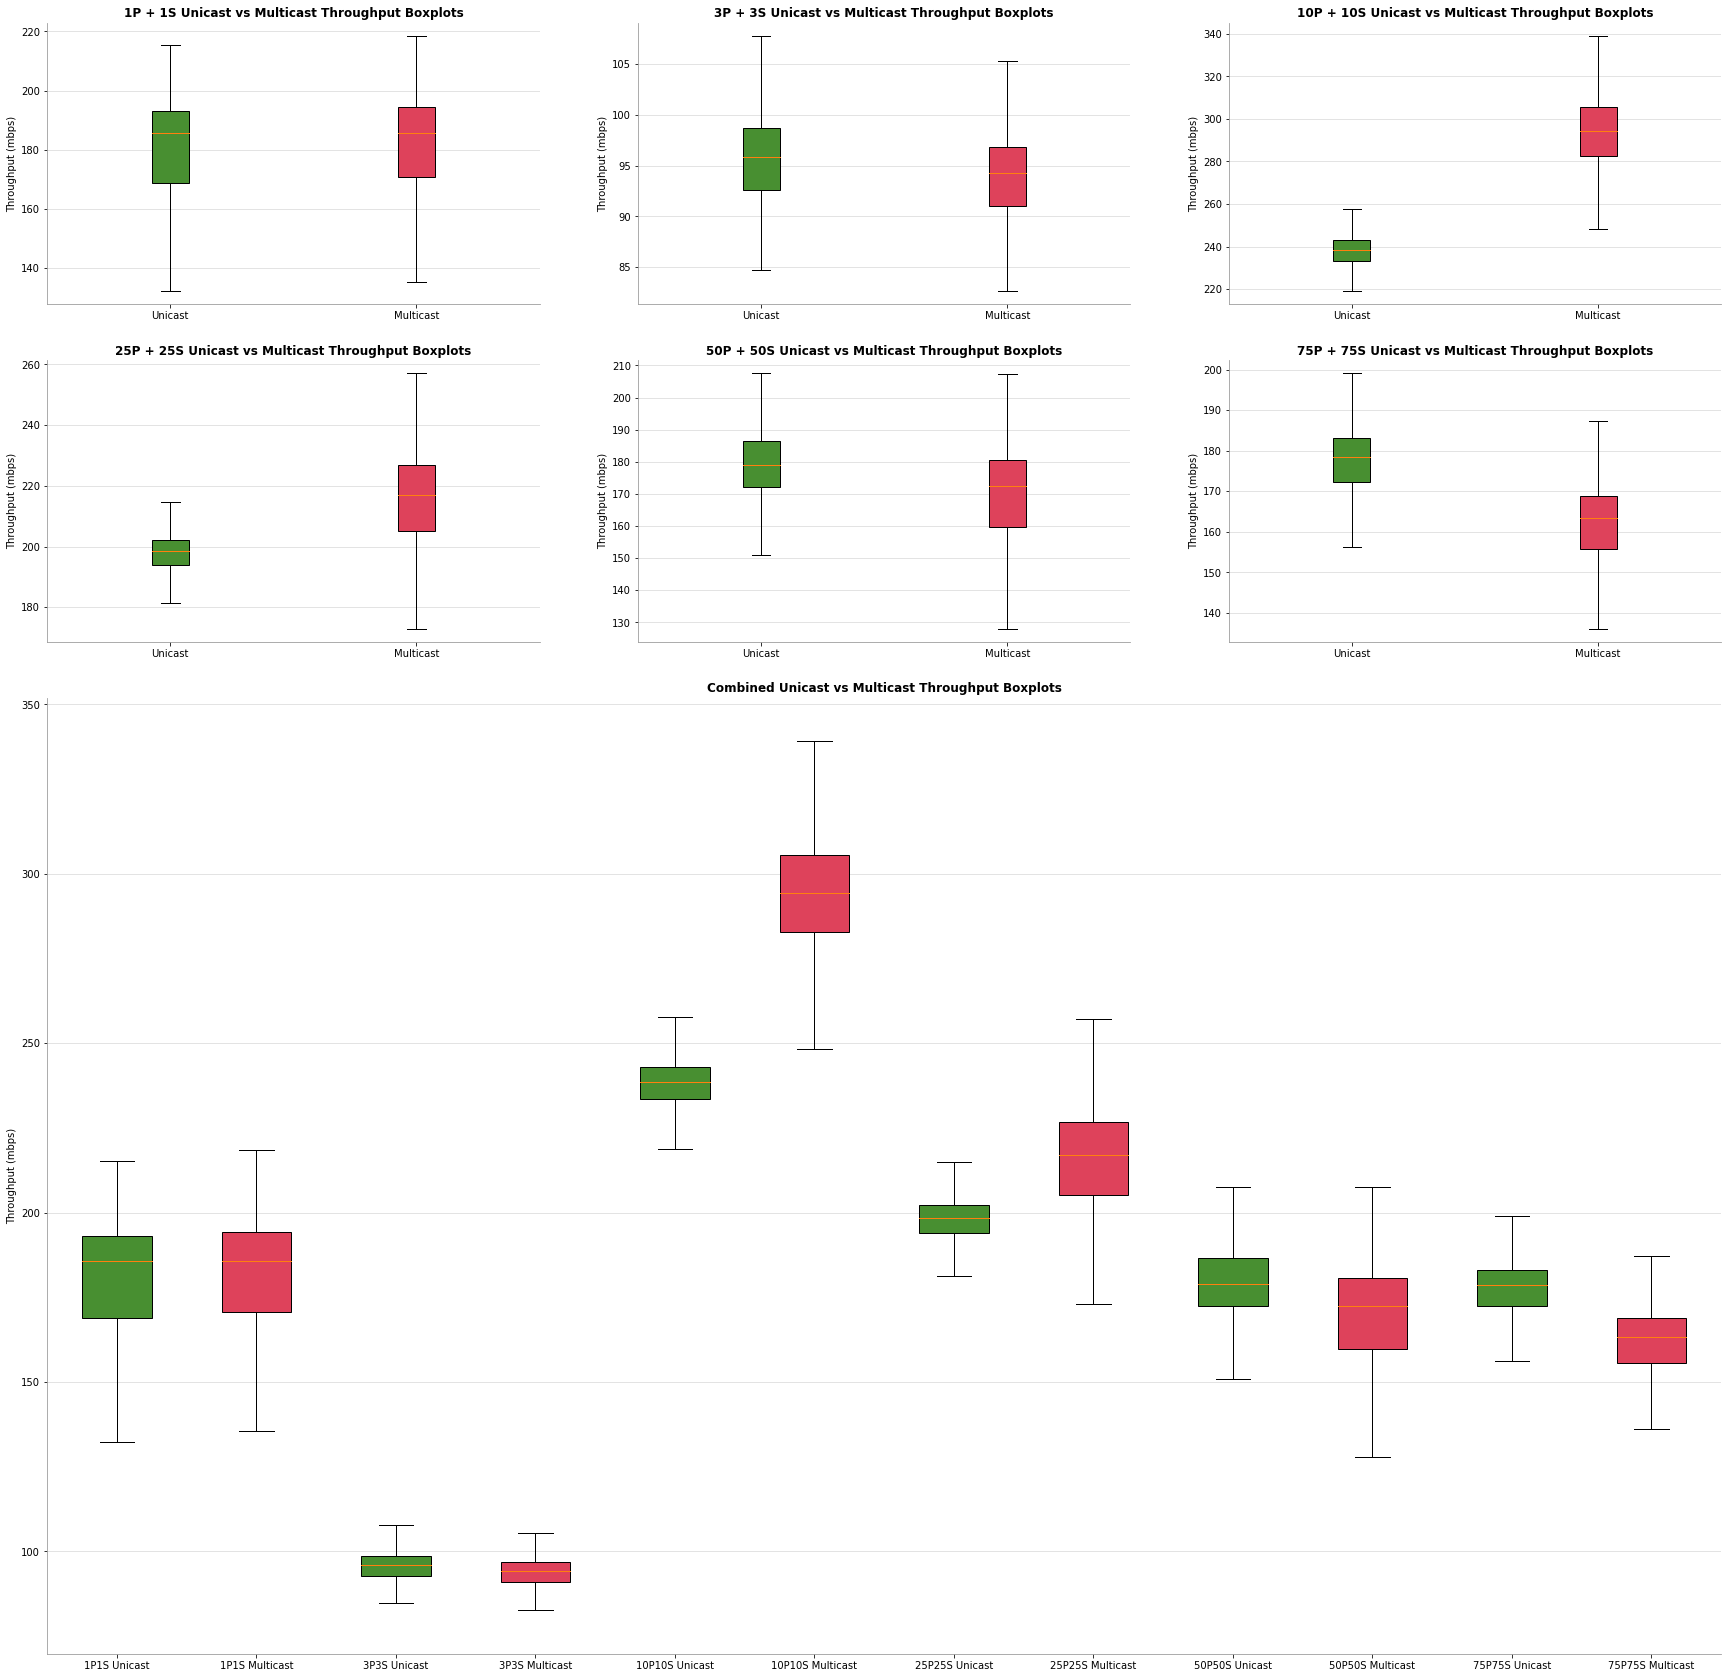

In [42]:
ucast_vs_mcast_tp_boxplots()

### What does the data tell us?
- 10p10s:
    - Ucast has median of around 240mbps and mcast has median of around 290mbps - a difference of 50mbps
        - Mcast subs are getting a lot more data per second
    - Ucast has generally lower throughput than mcast
        - Ucast subs are getting less data per second
    - Mcast outperforms ucast
- 25p25s:
    - Ucast has median of around 200mbps and mcast has median of around 220mbps - a difference of 20mbps
    - Ucast ranges from 180mbps to 215mbps (35mbps diff)
    - Mcast ranges from 175mbps to 255mbps (80mbps diff)
    - Mcast outperforms ucast
- 50p50s:
    - Ucast has median of around 180mbps and mcast has median of around 175mbps - a difference of 5mbps
    - Ucast ranges from 150mbps to 205mbps (55mbps diff)
    - Mcast ranges from 130mbps to 205mbps (75mbps diff)
    - Ucast outperforms mcast
- 75p75s:
    - Ucast has median of around 180mbps and mcast has median of around 165mbps - a difference of 15mbps
    - Ucast ranges from 155mbps to 200mbps (45mbps diff)
    - Mcast ranges from 135mbps to 185mbps (50mbps diff)
    - Ucast outperforms mcast

### What exactly does this mean?
- Mcast outperforms ucast for 10p10s and 25p25s
    - Subs are getting more data than ucast for every second
- Ucast outperforms mcast for 50p50s and 75p75s
    - Ucast subs are getting more data than mcast subs

### How can we find out why this is happening?
- Let's plot the general total throughput for each participant amount

## Unicast vs Multicast Throughput Line Plots

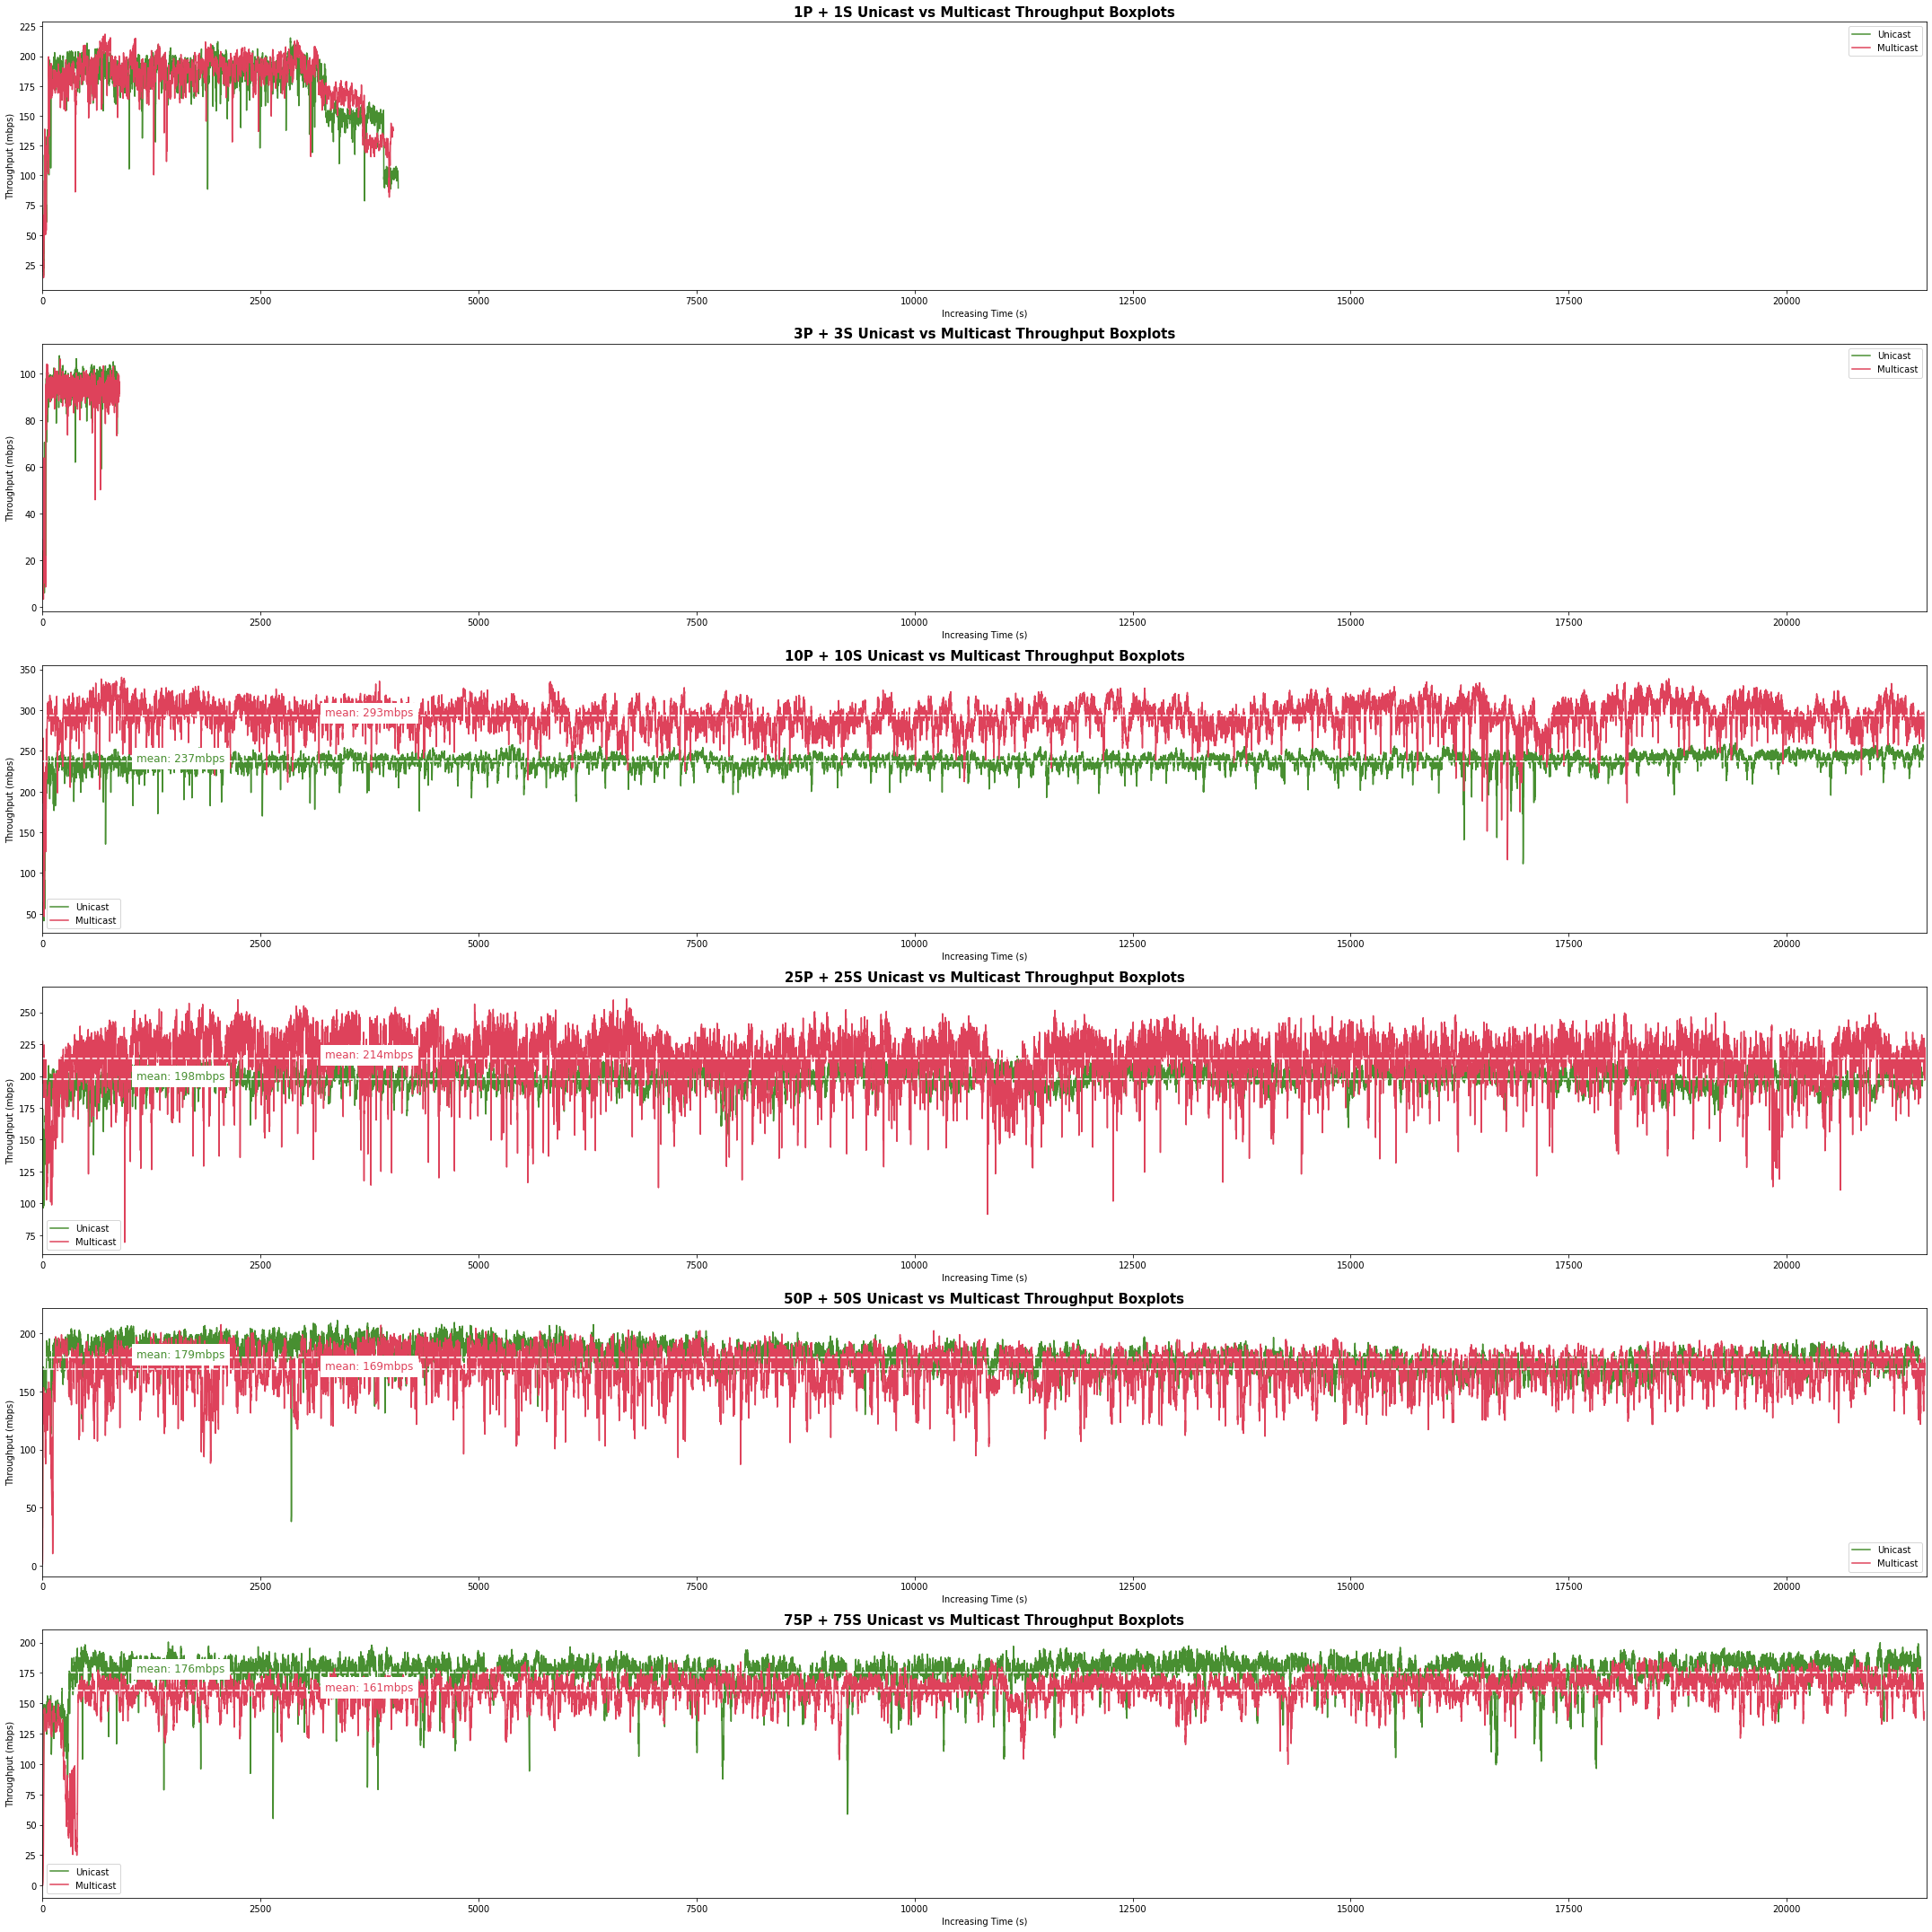

In [57]:
ucast_vs_mcast_tp_line_plots()

### What does the data tell us?
- 10p10s:
    - ucast mean is 237mbps and mcast mean is 293mbps (56mbps diff)
    - red line is noticeably higher than green line
- 25p25s:
    - ucast mean is 198mbps and mcast mean is 214mbps (16mbps diff)
    - You can see that the red lines are higher than the green lines even though they do touch
- 50p50s:
    - ucast has mean of 179mbps and mcast has mean of 169mbps (10mbps diff)
    - the two lines are a lot closer to each other and there is no visible separation
- 75p75s:
    - ucast has mean of 176mbps and mcast has mean of 161mbps (15mbps diff)
    - green line is noticeably higher than red line

### What does this mean?
- 10p10s: confirms that mcast outperforms ucast
- 25p25s: still confirms that mcast outperforms ucast
- 50p50s: ucast is slightly outperforming mcast but its not noticeable
- 75p75s: ucast outperforms mcast but not by too much difference

We can further confirm results by plotting CDFs.

## Unicast vs Multicast Throughput CDFs

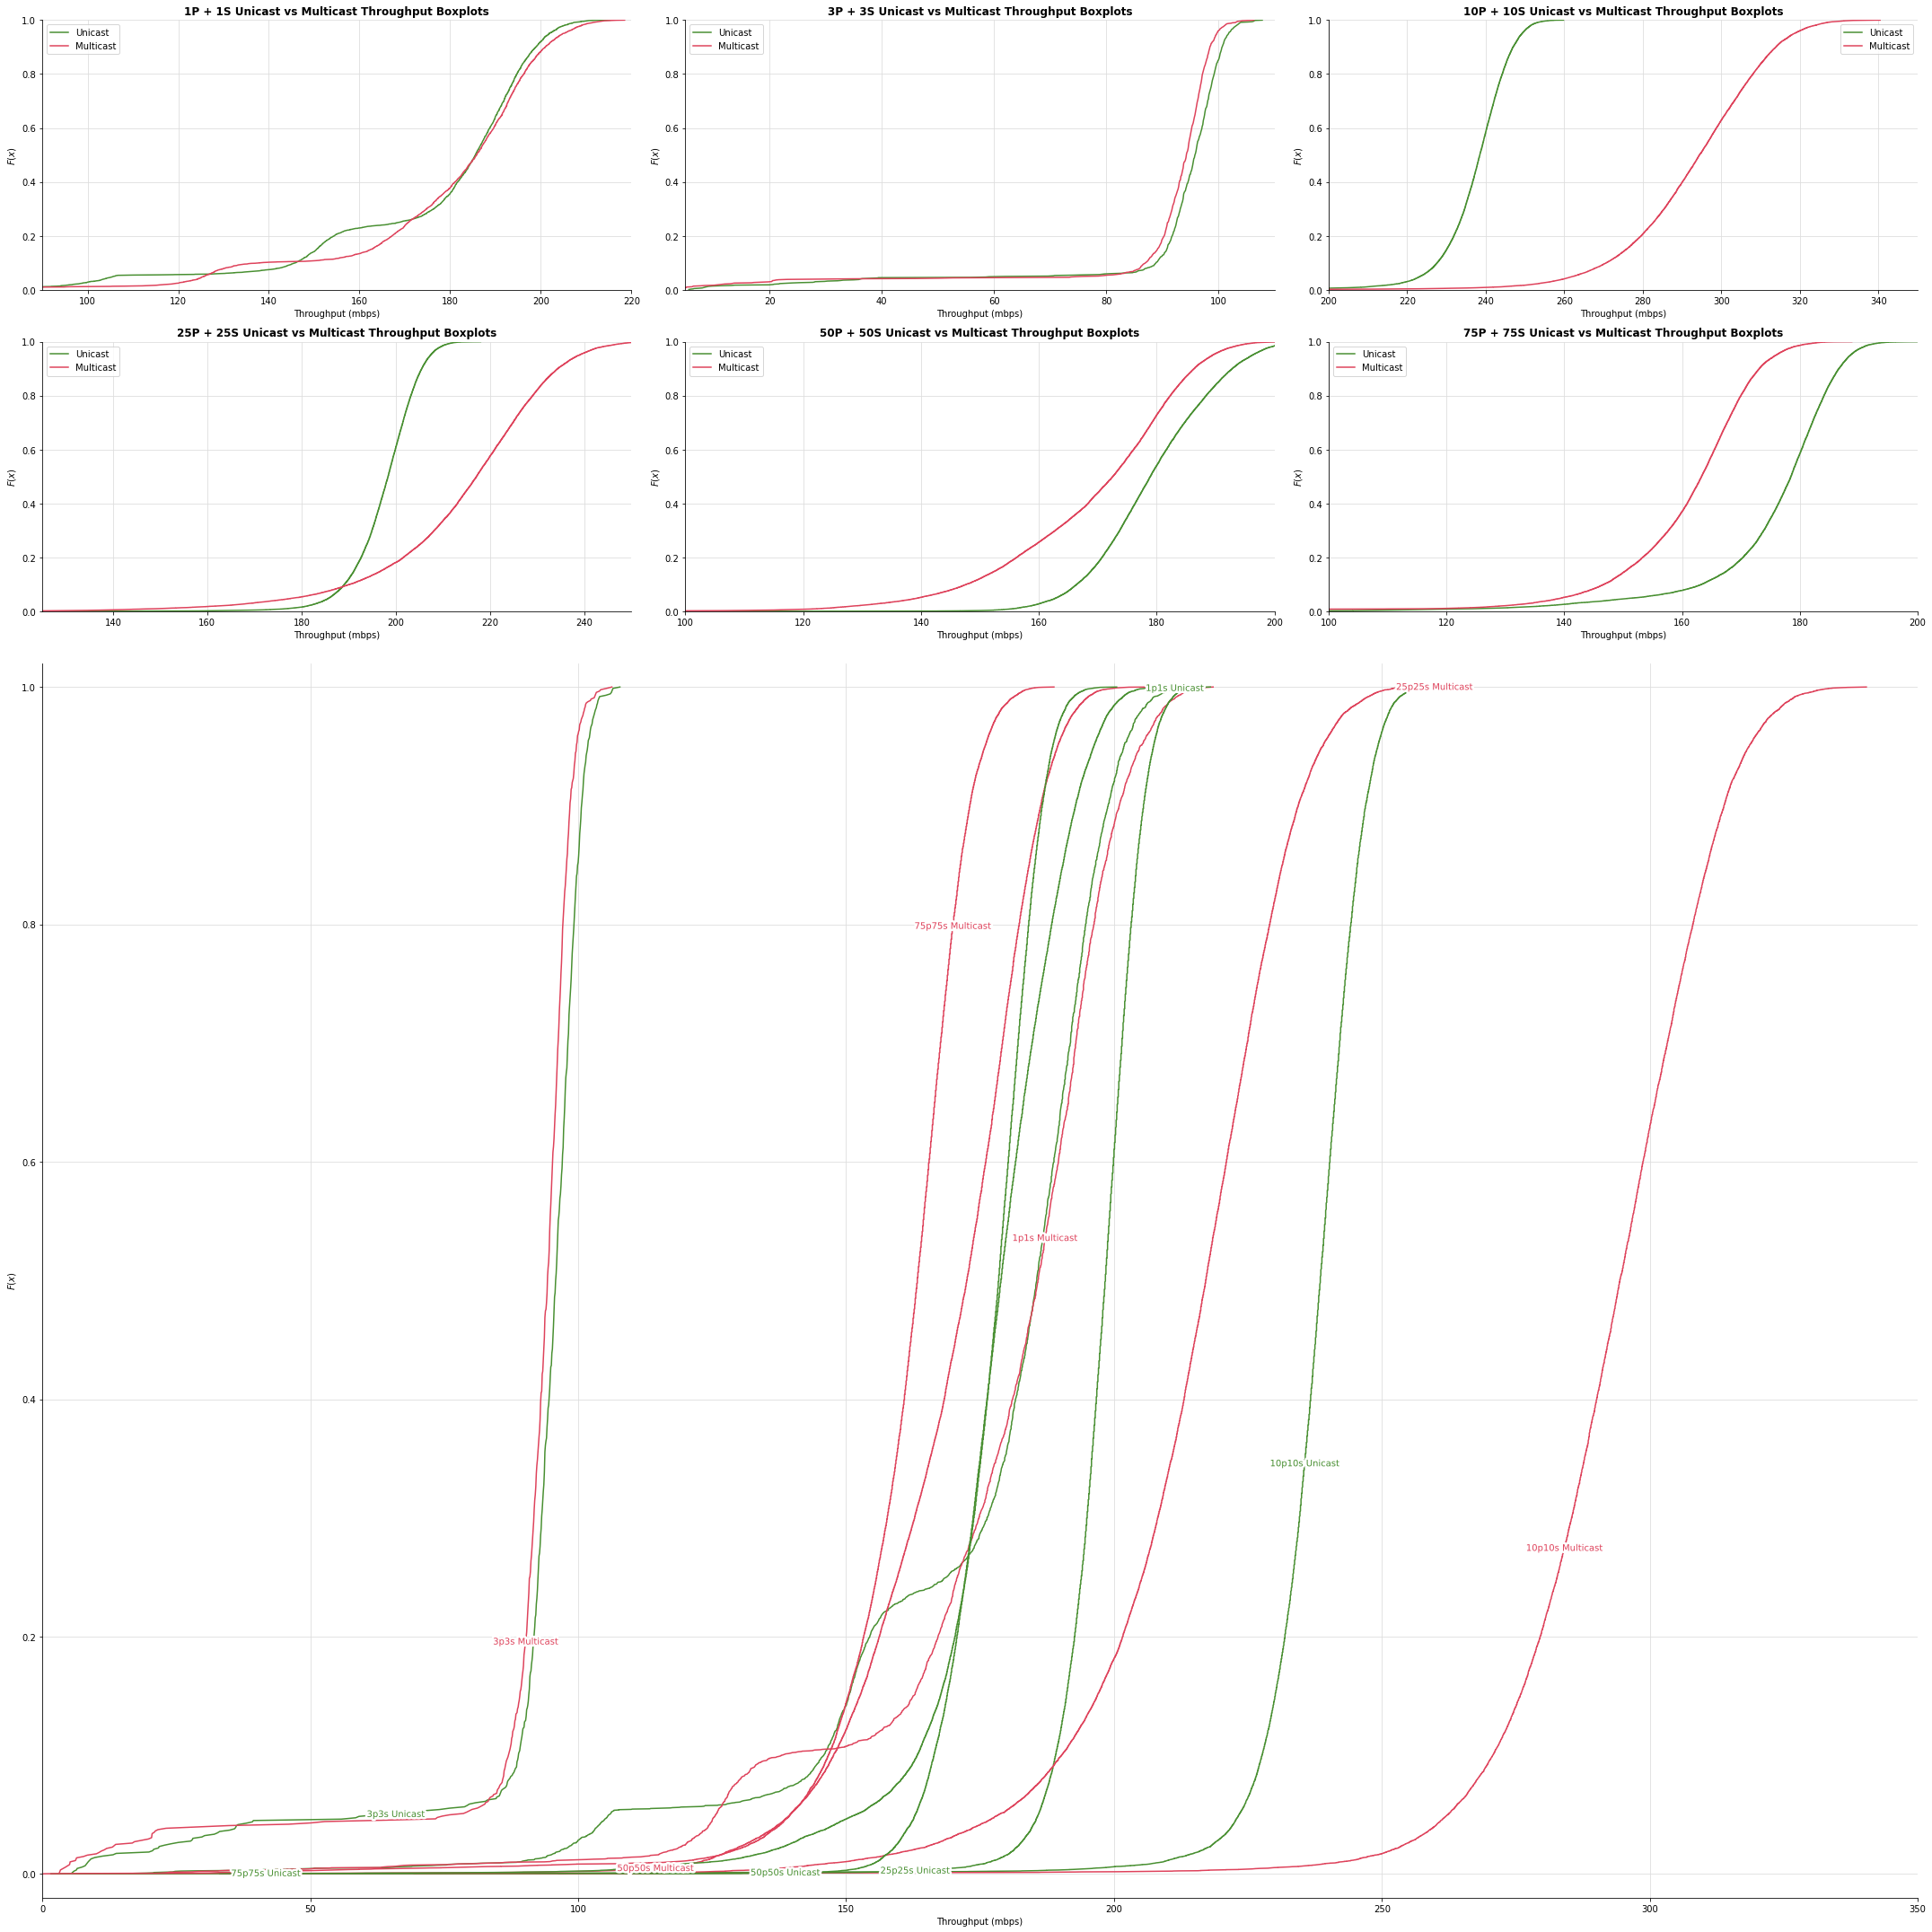

In [51]:
import warnings
warnings.filterwarnings("ignore")
    
ucast_vs_mcast_tp_cdfs()

### What does the data tell us?
- 10p10s:
    - mcast outperforms ucast by a lot
- 25p25s:
    - up to 190mbps, ucast outperforms mcast
    - mcast has more measurements including throughputs of 190mbps and above
    - mcast outperforms ucast for 90% of the data
- 50p50s:
    - ucast outperforms mcast but not by a lot
- 75p75s:
    - ucast outperforms mcast quite a bit

### What exactly does this mean?
- It confirms that the opposite of what should be happening is true....
    - Mcast outperforms ucast for 10p10s and 25p25s and its the other way round for 50p50s and 75p75s
- Maybe 25p25s is like the most optimal setup for multiple participants in order for mcast to be used and everything above that is pushing the limits?
    - To investigate this we could run tests with 1, 2, 3, 4, 5, 15, 20, 30, 35, 40, 45, etc. pubs and subs to see where the performance turning point is

## Data Summaries

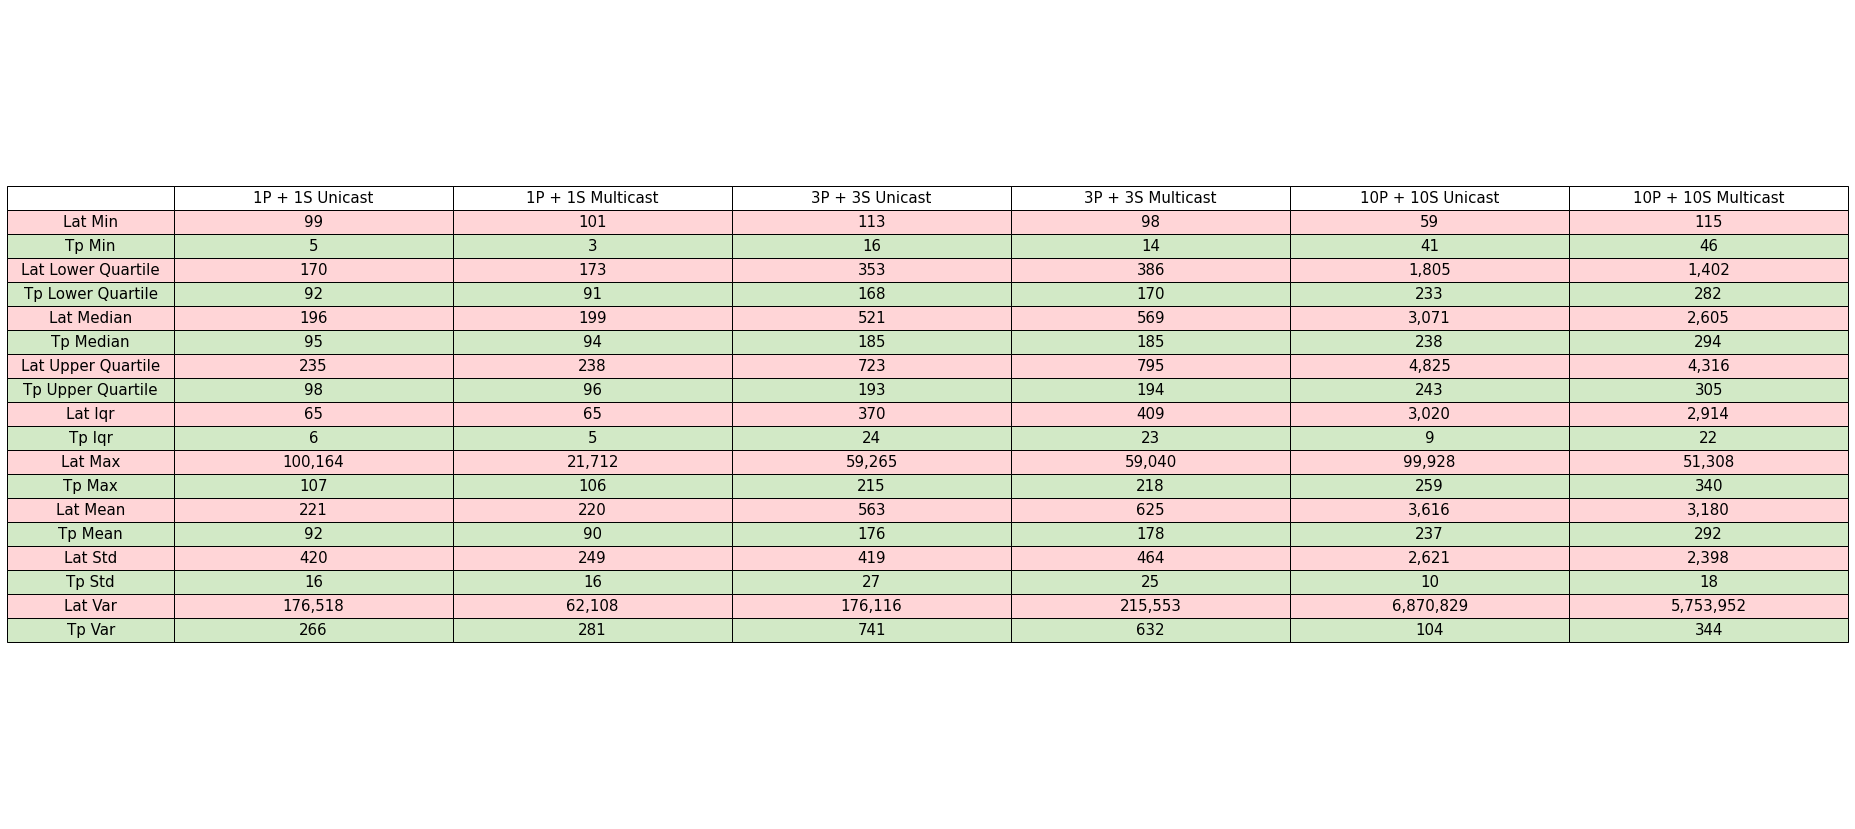

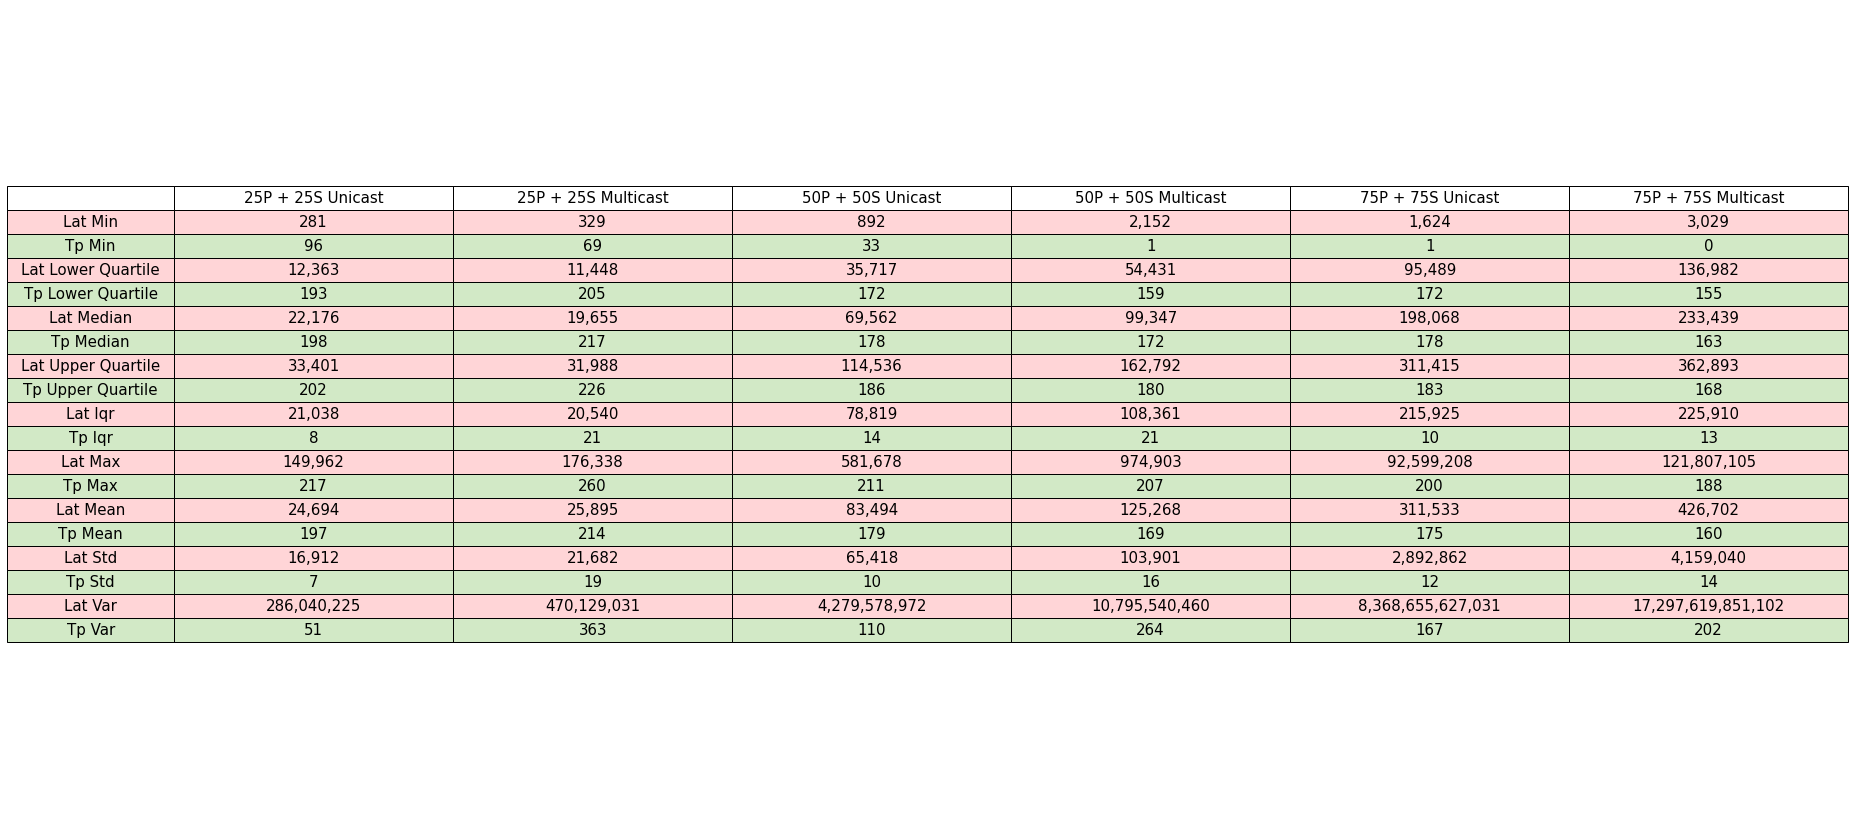

In [137]:
files_1p1s = [file for file in get_files("data/v2/set_1") if "average" in file and ("1_3_" in file or "1_4_" in file)]
dfs_1p1s = get_test_dfs(files_1p1s)
files_3p3s = [file for file in get_files("data/v2/set_1") if "average" in file and ("1_1_" in file or "1_2_" in file)]
dfs_3p3s = get_test_dfs(files_3p3s)
files_10p10s = [file for file in get_files("data/v2/set_2") if "average" in file and "10p_10s" in file]
dfs_10p10s = get_test_dfs(files_10p10s)
files_25p25s = [file for file in get_files("data/v2/set_2") if "average" in file and "25p_25s" in file]
dfs_25p25s = get_test_dfs(files_25p25s)
files_50p50s = [file for file in get_files("data/v2/set_2") if "average" in file and "50p_50s" in file]
dfs_50p50s = get_test_dfs(files_50p50s)
files_75p75s = [file for file in get_files("data/v2/set_2") if "average" in file and "75p_75s" in file]
dfs_75p75s = get_test_dfs(files_75p75s)

tests1 = [
    {
        "test_name": "1P + 1S Unicast",
        "lat_df": dfs_1p1s["unicast"]["lat"],
        "tp_df": dfs_1p1s["unicast"]["tp"]
    },
    {
        "test_name": "1P + 1S Multicast",
        "lat_df": dfs_1p1s["multicast"]["lat"],
        "tp_df": dfs_1p1s["multicast"]["tp"]
    },
    {
        "test_name": "3P + 3S Unicast",
        "lat_df": dfs_3p3s["unicast"]["lat"],
        "tp_df": dfs_3p3s["unicast"]["tp"]
    },
    {
        "test_name": "3P + 3S Multicast",
        "lat_df": dfs_3p3s["multicast"]["lat"],
        "tp_df": dfs_3p3s["multicast"]["tp"]
    },
    {
        "test_name": "10P + 10S Unicast",
        "lat_df": dfs_10p10s["unicast"]["lat"],
        "tp_df": dfs_10p10s["unicast"]["tp"]
    },
    {
        "test_name": "10P + 10S Multicast",
        "lat_df": dfs_10p10s["multicast"]["lat"],
        "tp_df": dfs_10p10s["multicast"]["tp"]
    }
]
tests2 = [
    {
        "test_name": "25P + 25S Unicast",
        "lat_df": dfs_25p25s["unicast"]["lat"],
        "tp_df": dfs_25p25s["unicast"]["tp"]
    },
    {
        "test_name": "25P + 25S Multicast",
        "lat_df": dfs_25p25s["multicast"]["lat"],
        "tp_df": dfs_25p25s["multicast"]["tp"]
    },
    {
        "test_name": "50P + 50S Unicast",
        "lat_df": dfs_50p50s["unicast"]["lat"],
        "tp_df": dfs_50p50s["unicast"]["tp"]
    },
    {
        "test_name": "50P + 50S Multicast",
        "lat_df": dfs_50p50s["multicast"]["lat"],
        "tp_df": dfs_50p50s["multicast"]["tp"]
    },
    {
        "test_name": "75P + 75S Unicast",
        "lat_df": dfs_75p75s["unicast"]["lat"],
        "tp_df": dfs_75p75s["unicast"]["tp"]
    },
    {
        "test_name": "75P + 75S Multicast",
        "lat_df": dfs_75p75s["multicast"]["lat"],
        "tp_df": dfs_75p75s["multicast"]["tp"]
    }
]

plot_summary_table(tests1)
plot_summary_table(tests2)

# for thing in [dfs_1p1s, dfs_3p3s, dfs_10p10s, dfs_25p25s, dfs_50p50s, dfs_75p75s]:
#     for df in thing:
#         for item in thing[df]:
#             print(thing[df][item].head())